In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 -4*x + 5

In [ ]:
f(3)

In [ ]:
xs = np.arange(-5,5,0.25)
xs

In [ ]:
ys = f(xs)
ys

In [ ]:
plt.plot(xs,ys)

In [ ]:
h = 0.0001
x = 3.0
(f(x+h) - f(x))/h

In [ ]:
h = 0.0001
x = -3.0
(f(x+h) - f(x))/h

In [ ]:
#get more complex
a = 2.0
b = -3.0
c = 10
d = a * b + c
print(d)

In [ ]:
h=0.00001

#inputs
a = 2.0
b = -3.0
c = 10
d1 = a * b + c

a += h
d2 = a * b + c

print("d2", d2)
print("d1", d1)

print("slope", (d2 - d1)/h)

In [ ]:
d1 = a * b + c

b += h
d2 = a * b + c


In [ ]:
print("d2", d2)
print("d1", d1)

print("slope", (d2 - d1)/h)

In [ ]:
d1 = a * b + c

c += h
d2 = a * b + c

In [ ]:
print("d2", d2)
print("d1", d1)

print("slope", (d2 - d1)/h)

## Neural Nets

In [ ]:
class Value:
    def __init__(self,data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        return Value(self.data + other.data)
    def __mul__(self, other):
        return Value(self.data * other.data)

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a + b


In [ ]:
a * b

In [ ]:
a * b + c

Add children to each operation

In [ ]:
class Value:
    def __init__(self,data, _children=()):
        self.data = data
        self._prev = set(_children)
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other))
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other))
        return out

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
d

In [ ]:
d._prev

Adding operation name to each operation type

In [ ]:
class Value:
    def __init__(self,data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other), _op='*')
        return out

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c
d.label = 'd'

f = Value(-2.0, label='f')
L = d * f
L.label = 'L'
L

In [ ]:
d._prev

In [ ]:
d._op

### Visualization code

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
L.grad = 1.0

In [ ]:
f.grad = 4.0 #because f.grad is dL/df = d
d.grad = -2.0 #because f.grad is dL/dd = f

In [ ]:
#d = e +c
c.grad = -2.0 #dd/dc * dL/dd
e.grad = -2.0 #same as c by symmetry

In [ ]:
a.grad = (-2.0 * -3.0) #dL/de * de/da
b.grad = (2.0 * -2.0) #dL/de * de/db

In [ ]:
draw_dot(L)

In [ ]:
#dL/da
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 

    print((L2-L1)/h)

lol()

In [ ]:
#dL/dd
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    d.data += h
     
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 

    print((L2-L1)/h)

lol()

In [ ]:
#dL/df
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    f.data += h
    L = d * f
    L.label = 'L'
    L2 = L.data 
    
    print((L2-L1)/h)

lol()

In [ ]:
#dL/dc
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    c.data += h
    
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    
    print((L2-L1)/h)
lol()

In [ ]:
#dL/de
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    
    e = a * b; e.label = 'e'
    e.data += h
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    print((L2-L1)/h)
lol()    

In [ ]:
#dL/da
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')

    a.data += h
    
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    print((L2-L1)/h)
lol()    

In [ ]:
#dL/db
def lol():
    h = 0.00001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L1 = L.data 

    a = Value(2.0 , label='a')

    
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')

    
    e = a * b; e.label = 'e'
    d = e + c
    d.label = 'd'

    f = Value(-2.0, label='f')
    L = d * f
    L.label = 'L'
    L2 = L.data 
    print((L2-L1)/h)
lol()    

### Increase L in the positive

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

In [ ]:
e = a * b
d = e + c
L = d * f

print(L.data)

In [ ]:
#inputs 
x1 = Value(2.0,label='x1')
x2 = Value(2.0,label='x2')

#weights 
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

#bias
b = Value(6.7, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label ='x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'

In [ ]:
draw_dot(n)

### Implementing tanh

In [ ]:
class Value:
    def __init__(self,data, _children=(), _op = '', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, _children=(self, other), _op='*')
        return out
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n) + 1)
        out = Value(t,_children=(self,), _op="tanh")
        return out

In [ ]:
#inputs 
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')

#weights 
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

#bias
# b = Value(6.7, label='b')
b = Value(6.8813735870195432, label='b')

x1w1 = x1 * w1; x1w1.label='x1*w1'
x2w2 = x2 * w2; x2w2.label ='x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1 + x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label='o'

In [ ]:
o.grad = 1.0

In [ ]:
n.grad = 1 - o.data**2
n.grad

In [ ]:
n.grad = 0.5

In [61]:
#+ sign equally flows the gradient ie same grad as that of n
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [62]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [63]:
#multiply sign grad takes the data value of the other variuable times the grad of the independent variable
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

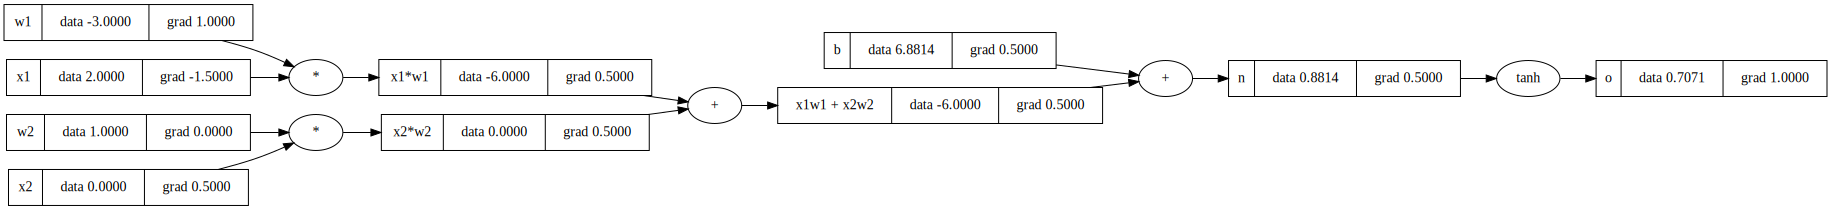

In [64]:
draw_dot(o)